In [1]:
# 导入所需的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# 1. 加载数据
data = pd.read_csv('EpochEnergy_c.csv')

5-Fold Cross-Validated MSE: 21898.455645929916
5-Fold Cross-Validated MAE: 120.51808055919096


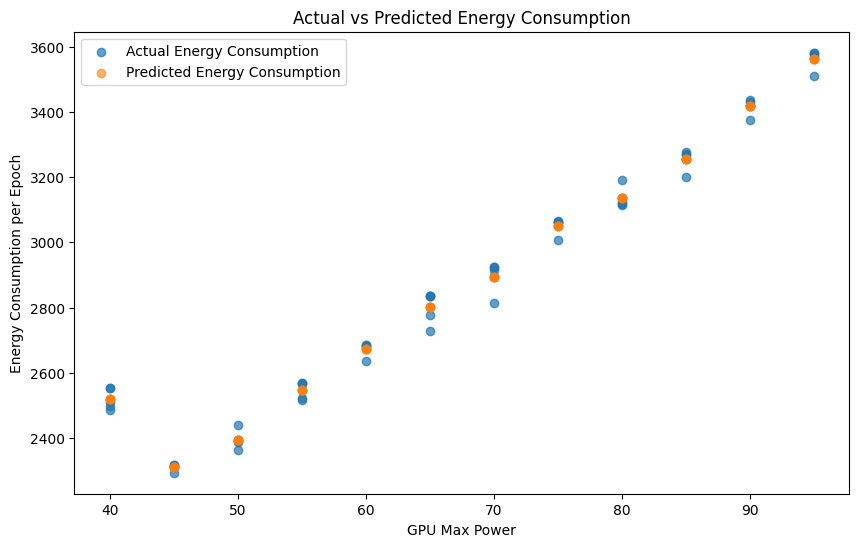

Predicted Energy Consumption for Max Power 35: 2520.4854276769993
Predicted Energy Consumption for Max Power 68: 2894.432936387463
Predicted Energy Consumption for Max Power 68: 3416.69984208935


In [3]:
# 2. 准备数据集：按列划分输入（X）和目标（Y）
# X 表示不同的功耗设定
X = data.columns[1:].astype(float).values.reshape(-1, 1)  # 以每列的列名值作为输入特征
Y = data.iloc[:, 1:].values.T  # 每列的数据按行作为输出（目标值）

# 3. 将数据转换为长格式，每个 (GPU功耗, 能耗) 成对数据
# 展开X和Y以形成新的DataFrame
X_expanded = np.repeat(X, Y.shape[1], axis=0)  # 重复每个最大功耗多次
Y_expanded = Y.flatten()  # 将能耗矩阵展平为1维

# 4. 创建长格式的 DataFrame
expanded_data = pd.DataFrame({'Max Power': X_expanded.flatten(), 'Energy Consumption': Y_expanded})

# 5. 分离特征和目标
X_long = expanded_data[['Max Power']].values
Y_long = expanded_data['Energy Consumption'].values

# 6. 使用梯度提升回归模型
gbr_model = GradientBoostingRegressor(random_state=42)

# 7. 进行5折交叉验证，评估模型性能
mse_scores_long = cross_val_score(gbr_model, X_long, Y_long, scoring='neg_mean_squared_error', cv=5)
mae_scores_long = cross_val_score(gbr_model, X_long, Y_long, scoring='neg_mean_absolute_error', cv=5)

# 转换为正值，并计算平均误差
mean_mse_long = -np.mean(mse_scores_long)
mean_mae_long = -np.mean(mae_scores_long)

print(f"5-Fold Cross-Validated MSE: {mean_mse_long}")
print(f"5-Fold Cross-Validated MAE: {mean_mae_long}")

# 8. 在整个数据集上训练模型
gbr_model.fit(X_long, Y_long)

# 9. 绘制实际值与预测值的对比图
Y_pred_long = gbr_model.predict(X_long)
plt.figure(figsize=(10, 6))
plt.scatter(X_long, Y_long, label='Actual Energy Consumption', alpha=0.7)
plt.scatter(X_long, Y_pred_long, label='Predicted Energy Consumption', alpha=0.6)
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

# 10. 预测新的功率上限值（例如 35 或 68）
power_input_35 = np.array([[35]])
predicted_energy_consumption_35 = gbr_model.predict(power_input_35)
print(f"Predicted Energy Consumption for Max Power 35: {predicted_energy_consumption_35[0]}")

power_input_68 = np.array([[68]])
predicted_energy_consumption_68 = gbr_model.predict(power_input_68)
print(f"Predicted Energy Consumption for Max Power 68: {predicted_energy_consumption_68[0]}")

power_input_68 = np.array([[88]])
predicted_energy_consumption_68 = gbr_model.predict(power_input_68)
print(f"Predicted Energy Consumption for Max Power 68: {predicted_energy_consumption_68[0]}")